False match rate
FMR = no. of successful access of unauthorised user / no. attempts of unauthorised users

False non match rate
FNMR = no. of unsuccessful access of authorised user / no. attempts of authorised users

In [99]:
# Initial values

Similarity = [
0.357895150227523
,0.473518915217542
,0.0599504565670546
,0.0887410791564728
,0.0756922701446284
,0.722029125869383
,0.073967257324095
,0.319232006160412
,0.228291996127948
,0.296500305530314
,0.0304837460453645
,0.6564002679605
,0.290762386182204
,0.48675312969213]

Truth = [1,0,0,0,0,1,1,1,1,1,0,0,0,1]

Threshold = [p/10 for p in range(1, 11)]

In [100]:
# Prediction Per Threshold Table

Prediction = [[int(j > i) for i in Threshold] for j in Similarity]

In [101]:
# False Positive Table
# false positive when prediction is 1 and truth 0
# p-t > 0

FP = [[int(p-t > 0) for p in p_list] for p_list, t in zip(Prediction, Truth)]
FP

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [102]:
# False Match Rate
# FMR = no. of successful access of unauthorised user / no. attempts of unauthorised users

Unauthorized_users = len(Truth) - sum(Truth)
FMR = [sum([col[i] for col in FP]) / Unauthorized_users for i in range(0, len(Threshold))]

In [103]:
# False Negative Table
# false negative when truth is 1 and prediction is 0
# t-p > 0

FN = [[int(t-p > 0) for p in p_list] for p_list, t in zip(Prediction, Truth)]

In [104]:
# False Non Match Rate
# FNMR = no. of unsuccessful access of authorised user / no. attempts of authorised users

Authorized_users = sum(Truth)
FNMR = [sum([col[i] for col in FN]) / Authorized_users for i in range(0, len(Threshold))]

In [105]:
print("False Match Rates:", FMR)
print("False Non Match Rates:", FNMR)

False Match Rates: [0.42857142857142855, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0]
False Non Match Rates: [0.14285714285714285, 0.14285714285714285, 0.42857142857142855, 0.7142857142857143, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0]


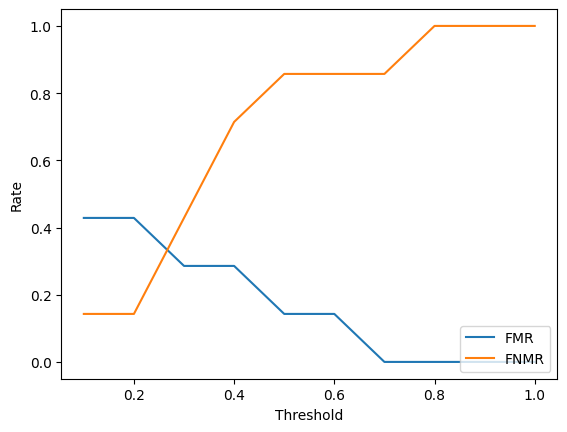

In [123]:
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame({'Threshold': Threshold, 'FMR': FMR, 'FNMR': FNMR})
results.plot(x=0)
plt.legend(loc='lower right')
plt.ylabel("Rate")
plt.show()